In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diabetes_model.code.config import load_env_vars
import yaml
import os
from azure.ai.ml import MLClient
from azure.identity import EnvironmentCredential
import mlflow
import shap
import pandas as pd

/home/jcummings/miniconda3/envs/diabetes-classifier-model/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
load_env_vars(config_filename = "config.yaml", config_secret_filename="config_secret.yaml")

In [4]:
model_analysis_config_filename = os.path.join("notebooks", "model_analysis_config.yaml")
with open(model_analysis_config_filename) as fp:
    model_analysis_config_dict = yaml.safe_load(fp)

In [5]:
model_name = model_analysis_config_dict["model_name"]
model_version = model_analysis_config_dict["version"]
download_path = model_analysis_config_dict["download_path"]

In [6]:
ml_client = MLClient(
    subscription_id=os.environ["AZURE_ML_SUBSCRIPTION_ID"],
    resource_group_name=os.environ["AZURE_ML_RESOURCE_GROUP_NAME"],
    workspace_name=os.environ["AZURE_ML_WORKSPACE_NAME"],
    credential=EnvironmentCredential(),
)

In [7]:
ml_client.models.download(name=model_name, version = model_version, download_path = download_path)

In [8]:
model = mlflow.xgboost.load_model(os.path.join(download_path, model_name, "model"))

In [9]:
explainer = shap.Explainer(model)

In [10]:
X_test = pd.read_pickle(os.path.join("data", "training", "X_test.pkl"))

In [11]:
shap_values = explainer(X_test)

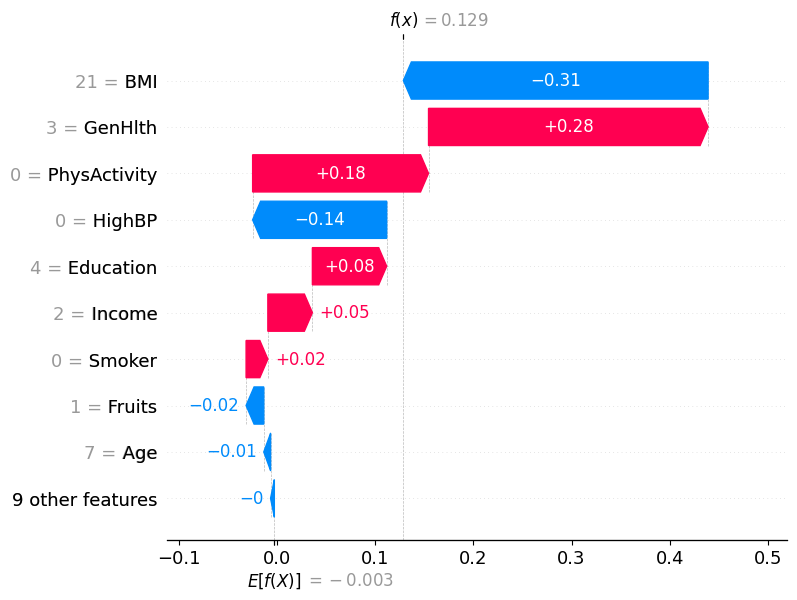

In [12]:
shap.plots.waterfall(shap_values[0])

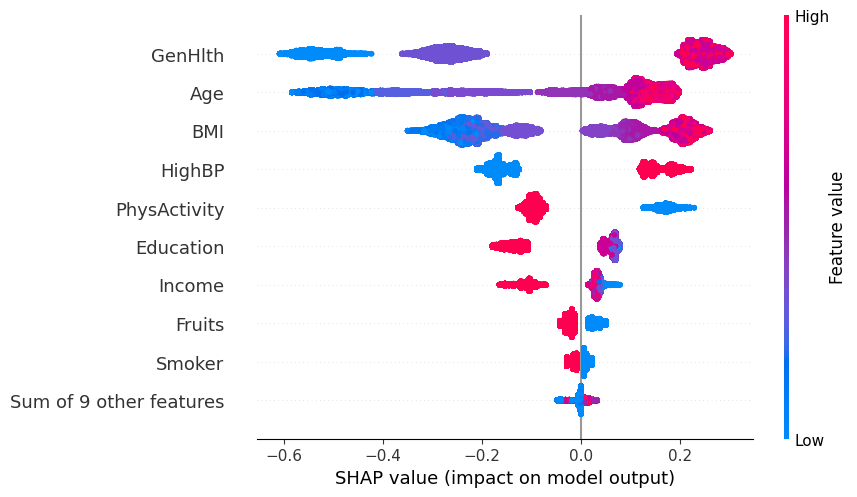

In [13]:
shap.plots.beeswarm(shap_values)